In [1]:
import pandas as pd
import scipy as sp
import numpy as np
import os
from scipy.stats import chi2

import glob
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
%matplotlib inline
from PIL import Image
import os
import urllib.request

from sklearn.decomposition import PCA

In [8]:
def pca(train_X, num_comps):
    trainX = np.asarray(train_X)
    x_bar = np.mean(trainX, axis=0)
    trainX_standard = trainX - x_bar # standardize data
    C = np.matmul(trainX_standard.T, trainX_standard) # Covariance matrix
    w, v = np.linalg.eig(C)
    x_projected = np.matmul(trainX_standard, v[:num_comps].T)
    #x_projected_full = np.matmul(trainX_standard, v.T)
    return x_projected, w, v


def pca_num_comp(eigh_vals, variance, title):
    # returns number of principal components required to achieve x% of data variance
    # get 90% of total sum of eigenvalues

    total_sum = np.sum(eigh_vals)
    accum_sum = 0
    percent = 0
    interm_variance = []
    interm_variance_frac = []

    for x in np.nditer(eigh_vals):
        accum_sum+=x
        interm_variance.append(accum_sum)

        percent = accum_sum/total_sum
        interm_variance_frac.append(percent)
        if percent*100 >= variance:
            print(title+ ": Number of components required to achieve "+ str(variance) + "% of data variance: " + str(len(interm_variance)))
            break
    num_comp = np.arange(len(interm_variance))
    plt.figure()
    plt.bar(num_comp, interm_variance_frac)
    plt.title("Principal Components vs. Accumulated Data Variance for: "+ title)
    plt.xlabel("Principal Components")
    plt.ylabel("Accumulated Data Variance")

    #return np.arange(len(interm_variance)), interm_variance, interm_variance_frac

def mahalanobis(x=None, data=None, cov=None):
    """Compute the Mahalanobis Distance between each row of x and the data  
    x    : vector or matrix of data with, say, p columns.
    data : ndarray of the distribution from which Mahalanobis distance of each observation of x is to be computed.
    cov  : covariance matrix (p x p) of the distribution. If None, will be computed from data.
    """
    x_minus_mu = x - np.mean(data)
    if not cov:
        cov = np.cov(data.values.T)
    inv_covmat = np.linalg.inv(cov)
    left_term = np.dot(x_minus_mu, inv_covmat)
    mahal = np.dot(left_term, x_minus_mu.T)
    return mahal.diagonal()


def run_analysis(model_name, dataset, mode, degrees, pval, num_features, pca_analysis=False, num_comps=16, plots=False, tsne=False):
    path = "../models/"+ model_name+"_"+dataset+"/"+mode+"_"+"features/"
    feature_filenames = os.listdir(path)
    extreme_vals = dict()
    all_features = []
    all_labels = []
    for file in feature_filenames:
        features = np.load(path+file, allow_pickle=True)
        if tsne == True:
            all_features.append(features)
            for i in range(features.shape[0]):
                all_labels.append(os.path.splitext(file)[0])
        df = pd.DataFrame(features)
        if pca_analysis==True:
            x_proj, eig_vals, eig_vecs = pca(df, num_comps)
            if plots == True:
                pca_num_comp(eig_vals, 90, file)
        df['mahala'] = mahalanobis(x=df, data=df)
        # Compute the P-Values
        df['p_value'] = 1 - chi2.cdf(df['mahala'], degrees)

        # Extreme values with a significance level of 0.01
        df_filtered= df.loc[df.p_value < pval]
        df_indices = df_filtered.index.values.tolist() 
        
        extreme_vals[file] = df_indices
    return extreme_vals, all_features, all_labels


In [30]:
model_name = 'resnet50'
dataset = 'openimages'
mode = 'pretrained' #or finetuned
degrees = 8
pval = 0.1
num_features = 10
resnet50_openimages, all_features, all_labels = run_analysis(model_name, dataset, mode, degrees, pval, num_features, pca_analysis=False, plots=False)

In [11]:
model_name = 'resnet50'
dataset = 'coco'
mode = 'pretrained' #or finetuned
degrees = 5
pval = 0.01
num_features = 8
resnet50_coco, all_features, all_labels = run_analysis(model_name, dataset, mode, degrees, pval, num_features, pca_analysis=False, plots=False)





fa_pt.npy: Number of components required to achieve 90% of data variance: 79
random_pt.npy: Number of components required to achieve 90% of data variance: 89
man_pt.npy: Number of components required to achieve 90% of data variance: 83
ca_pt.npy: Number of components required to achieve 90% of data variance: 73
sa_pt.npy: Number of components required to achieve 90% of data variance: 70
mw_pt.npy: Number of components required to achieve 90% of data variance: 82
mm_pt.npy: Number of components required to achieve 90% of data variance: 83
cw_pt.npy: Number of components required to achieve 90% of data variance: 32
ma_pt.npy: Number of components required to achieve 90% of data variance: 79
sw_pt.npy: Number of components required to achieve 90% of data variance: 22
cm_pt.npy: Number of components required to achieve 90% of data variance: 73
sm_pt.npy: Number of components required to achieve 90% of data variance: 58
fw_pt.npy: Number of components required to achieve 90% of data varianc

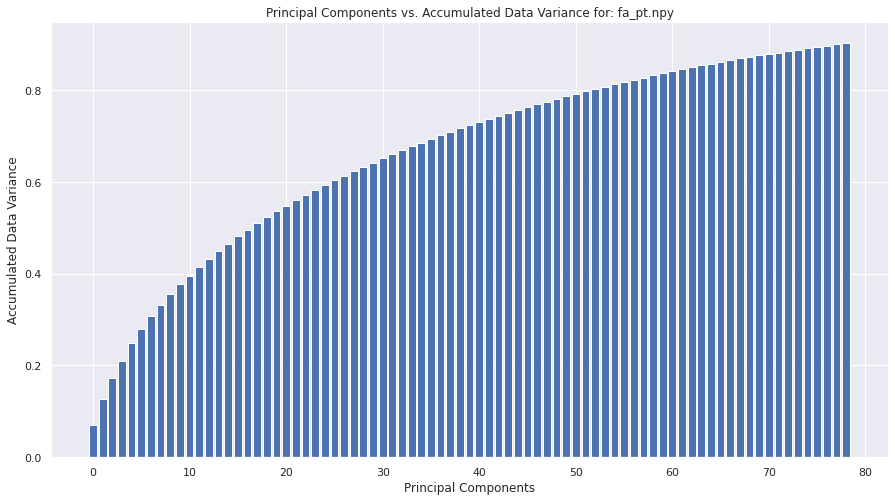

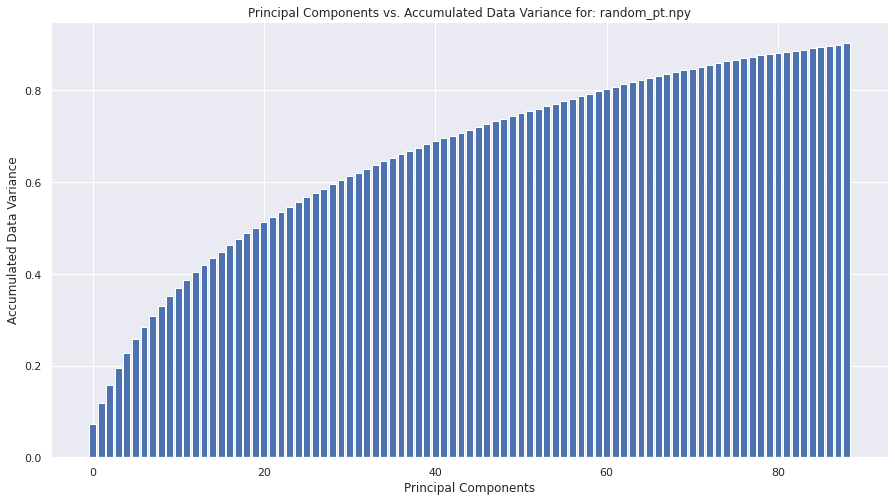

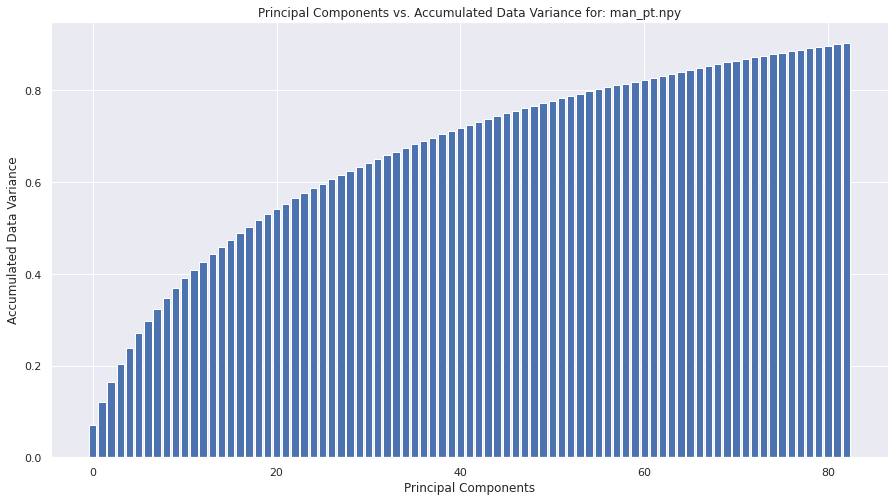

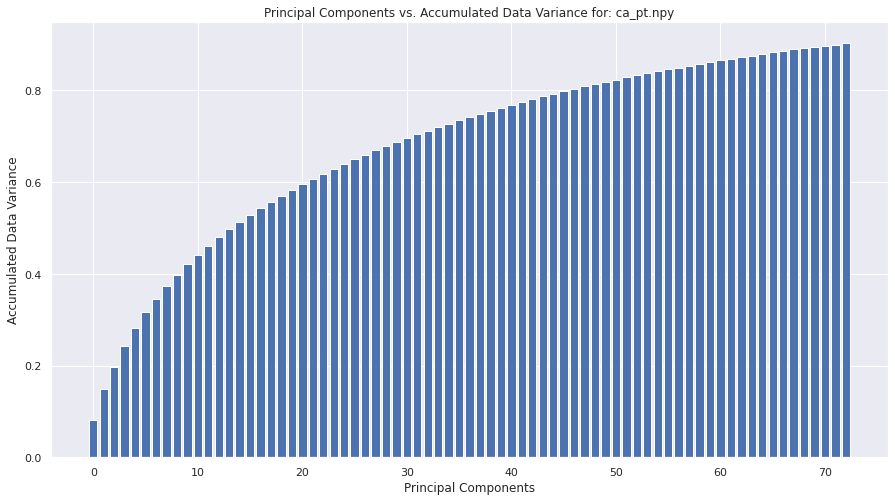

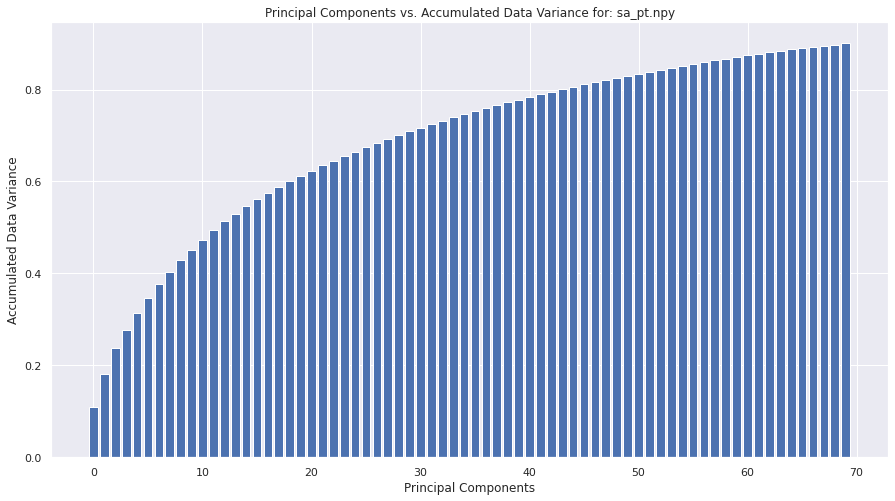

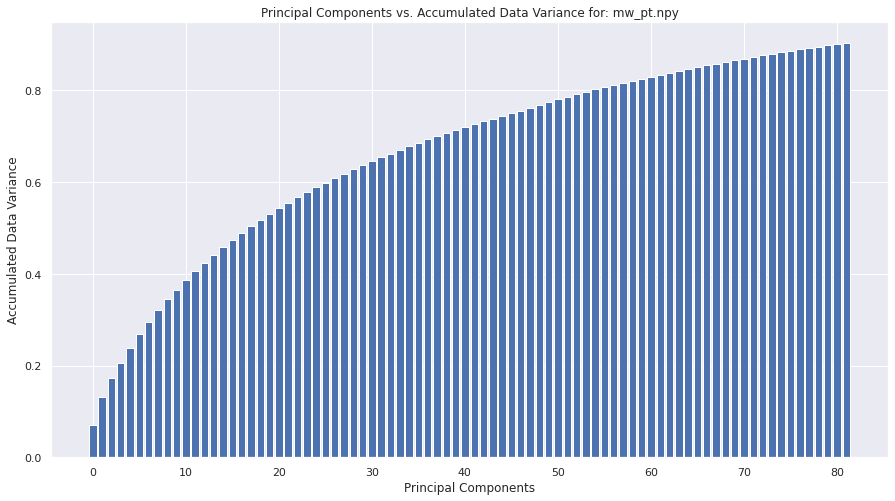

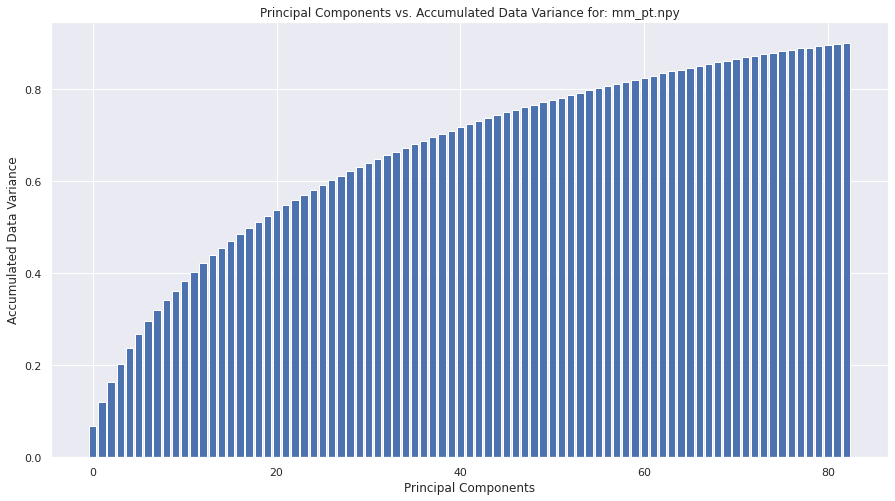

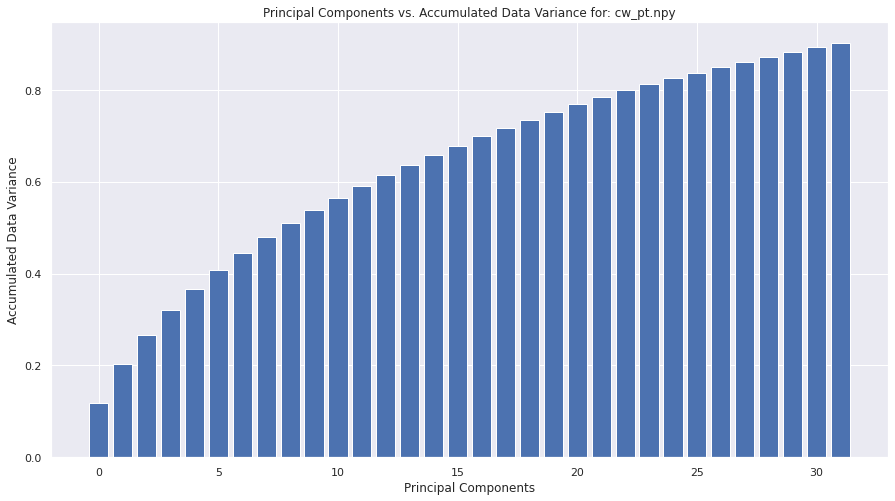

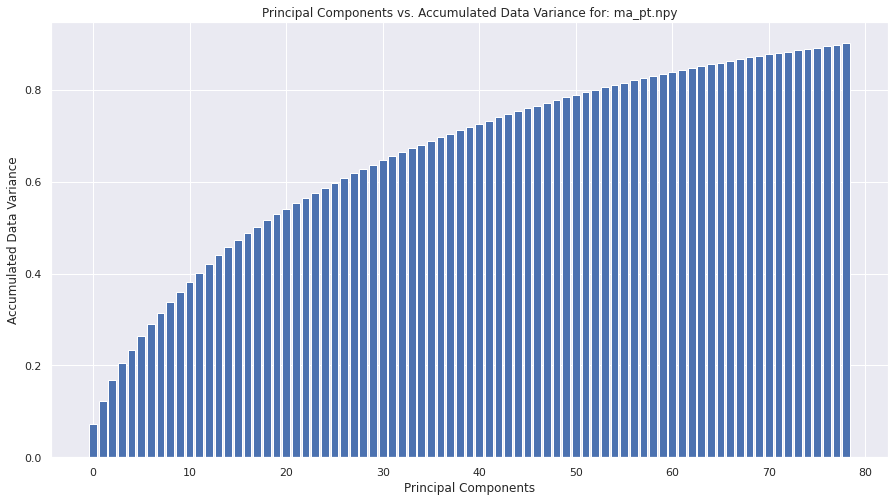

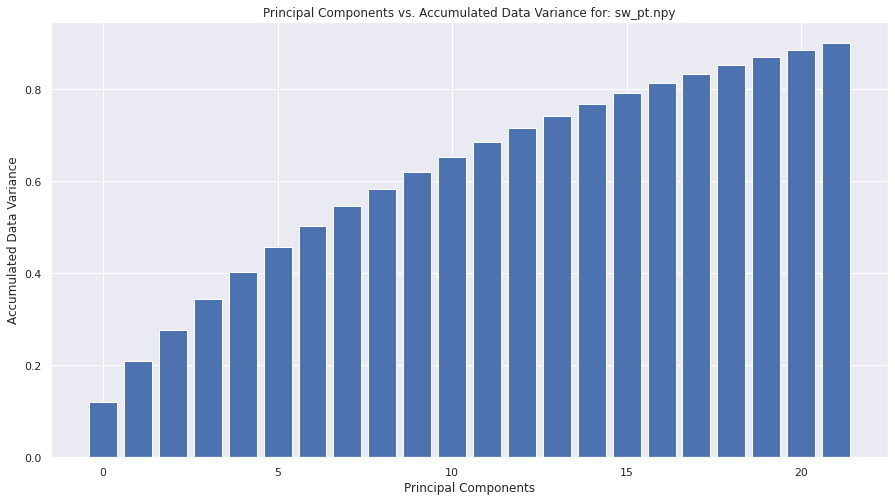

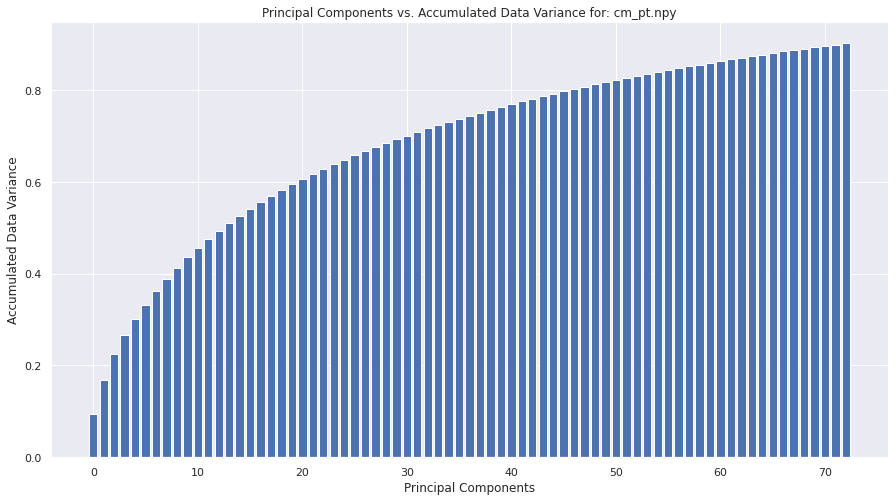

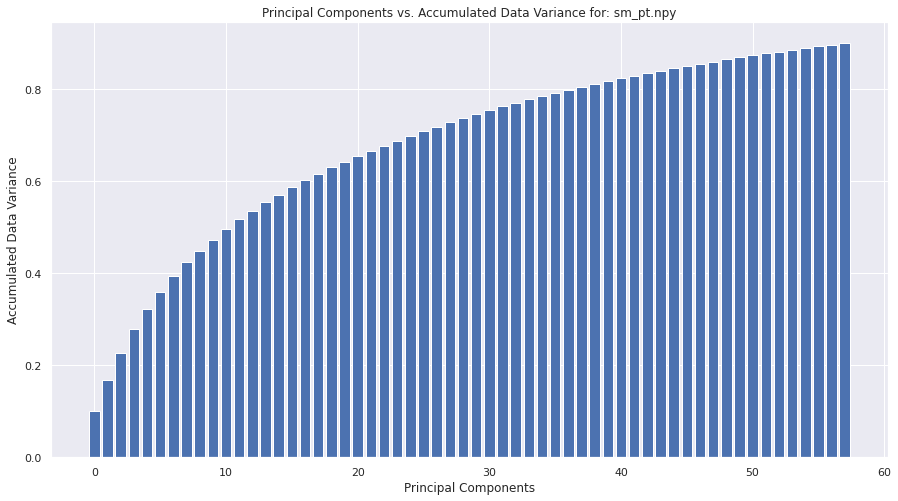

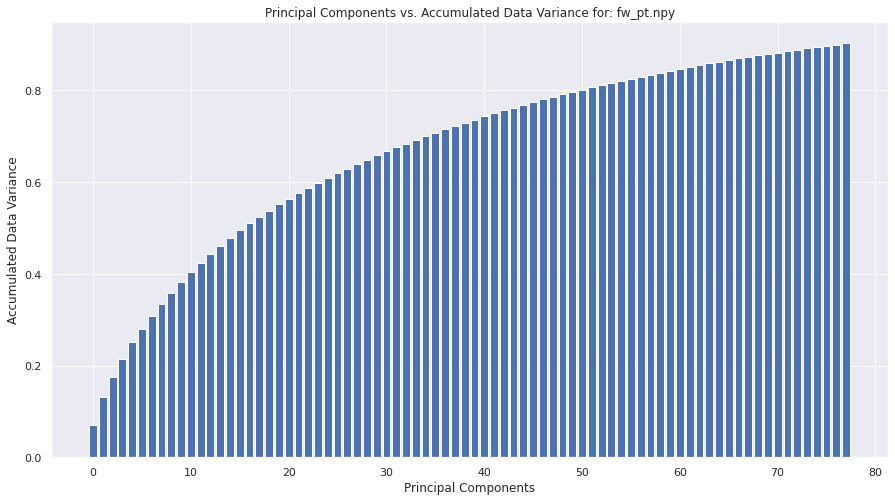

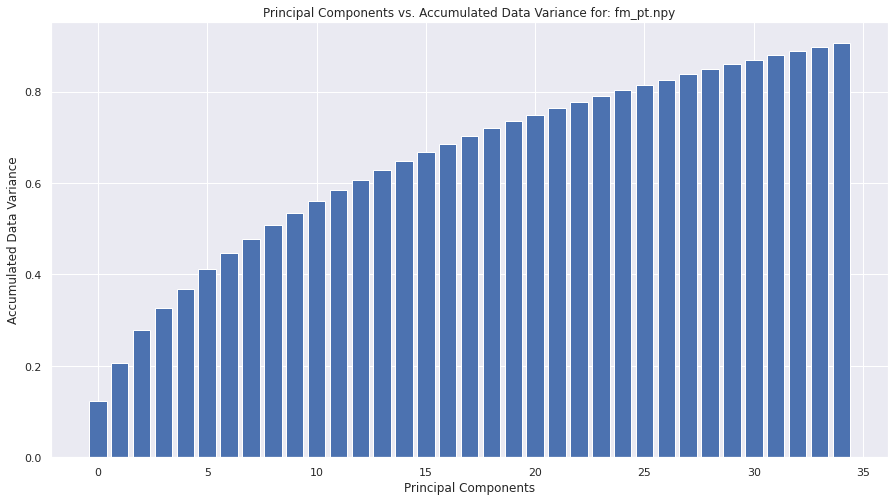

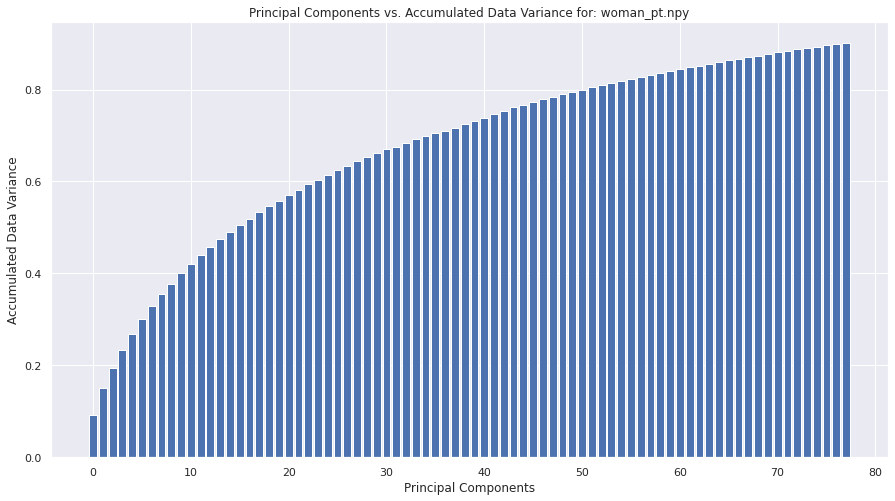

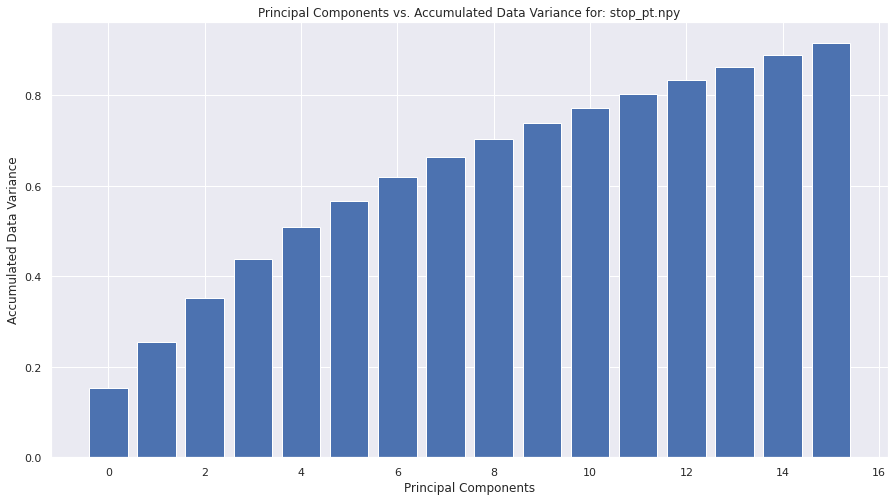

In [57]:
model_name = 'clip'
dataset = 'openimages'
mode = 'pretrained' #or finetuned
degrees = 5
pval = 0.01
num_features = 8
clip_openimages, all_features, all_labels = run_analysis(model_name, dataset, mode, degrees, pval, num_features, pca_analysis=True, plots=True)



random_pt.npy: Number of components required to achieve 90% of data variance: 15
woman_pt.npy: Number of components required to achieve 90% of data variance: 11
stop_pt.npy: Number of components required to achieve 90% of data variance: 27
sm_pt.npy: Number of components required to achieve 90% of data variance: 15
cm_pt.npy: Number of components required to achieve 90% of data variance: 7
sw_pt.npy: Number of components required to achieve 90% of data variance: 11
cw_pt.npy: Number of components required to achieve 90% of data variance: 5
rm_pt.npy: Number of components required to achieve 90% of data variance: 6
rw_pt.npy: Number of components required to achieve 90% of data variance: 6
man_pt.npy: Number of components required to achieve 90% of data variance: 9
ra_pt.npy: Number of components required to achieve 90% of data variance: 12
sa_pt.npy: Number of components required to achieve 90% of data variance: 10
ca_pt.npy: Number of components required to achieve 90% of data varianc

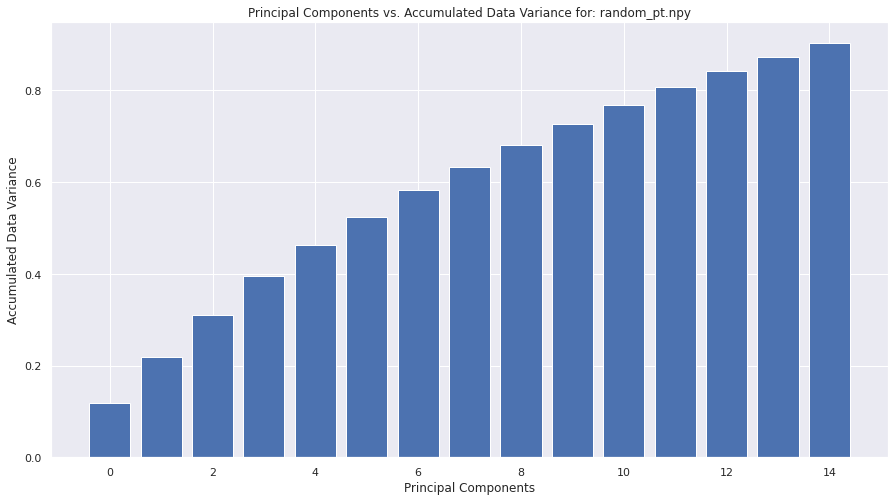

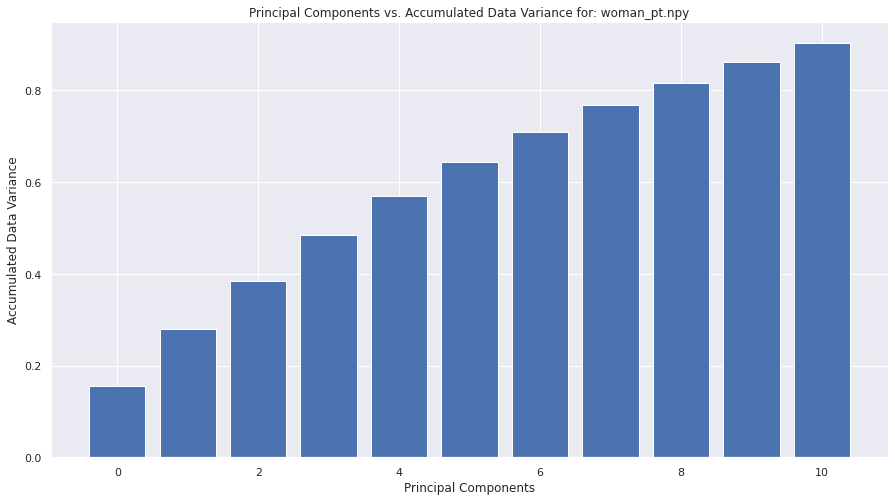

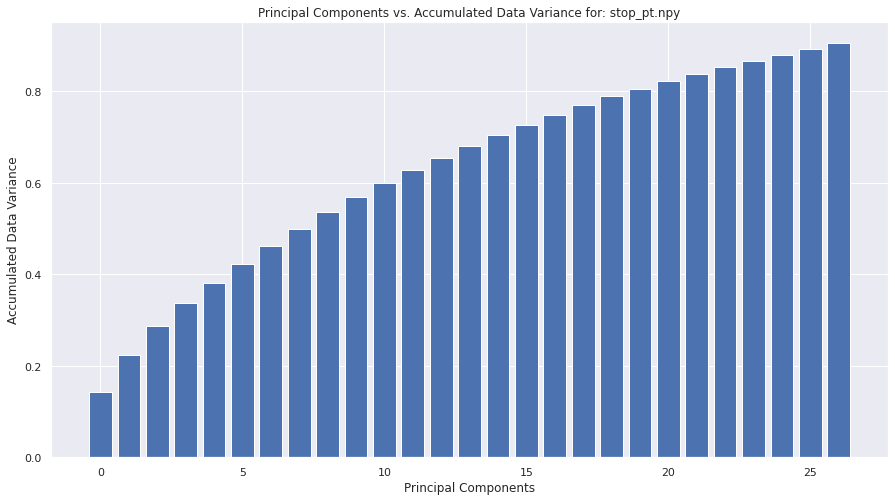

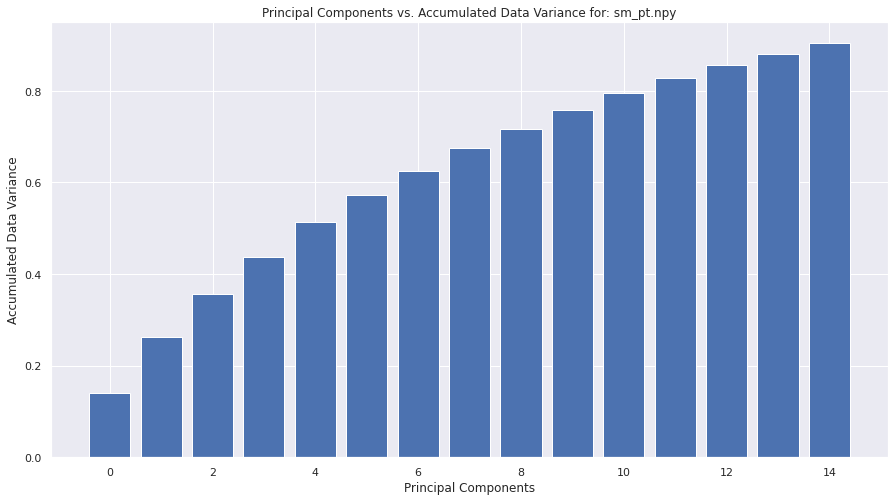

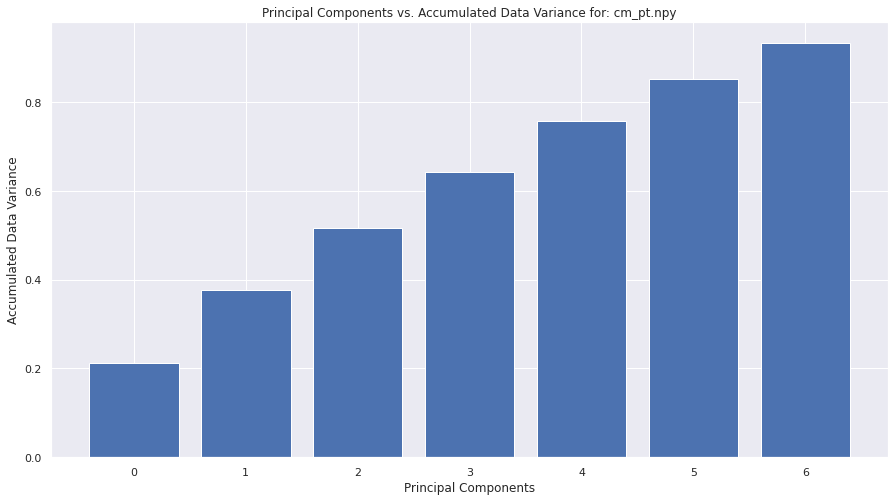

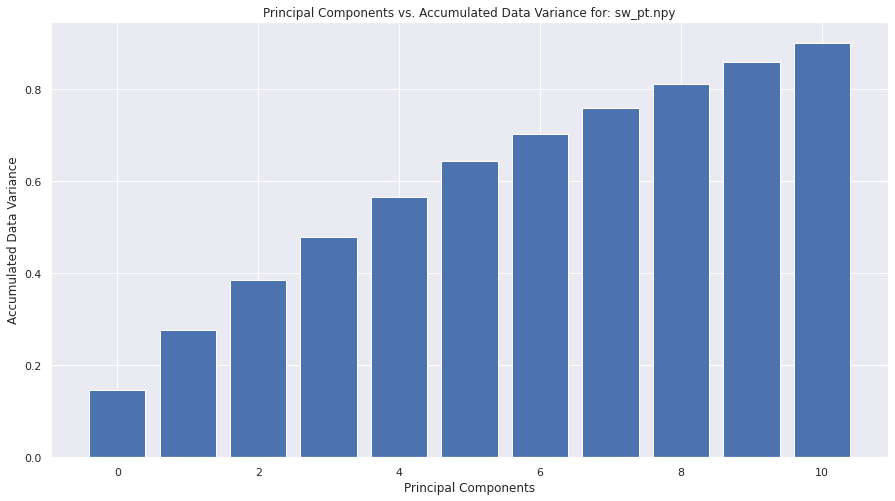

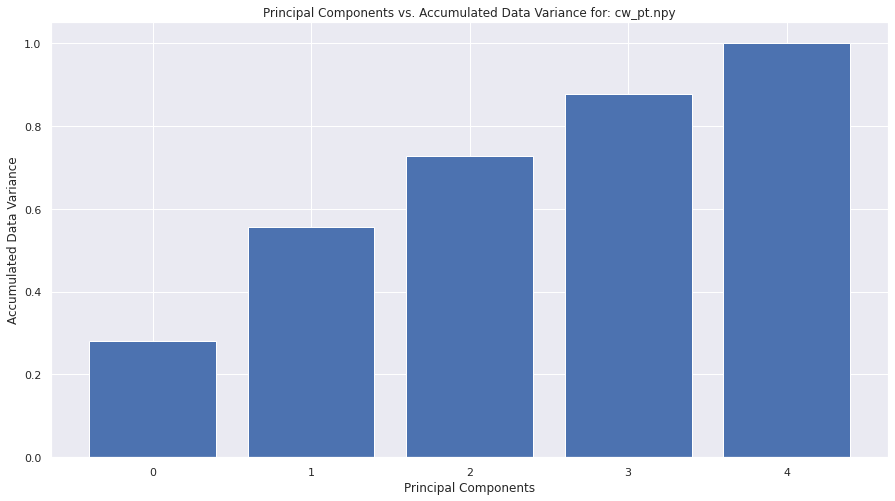

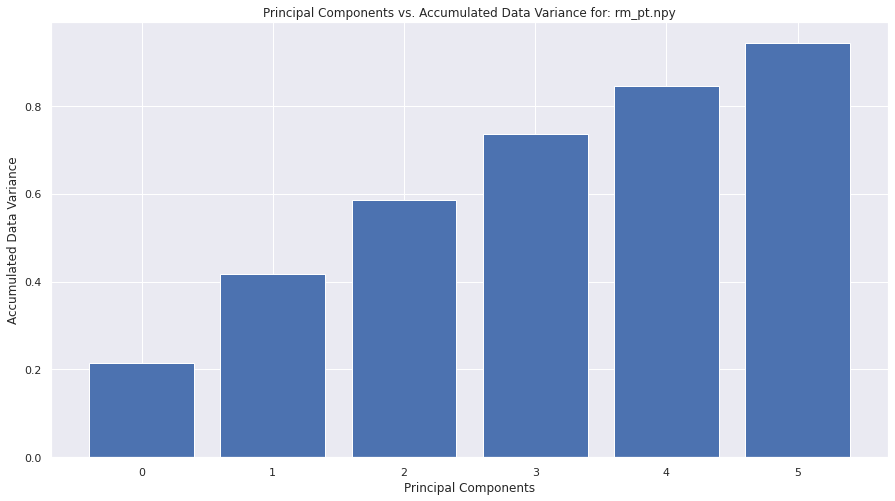

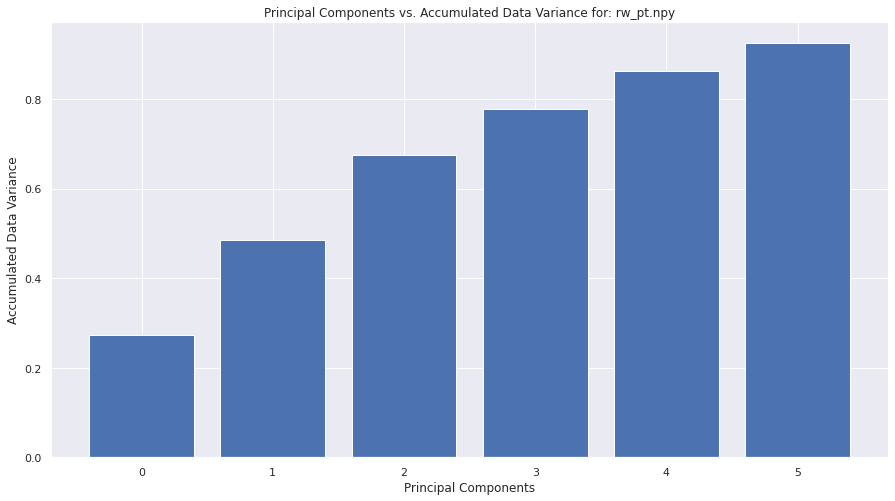

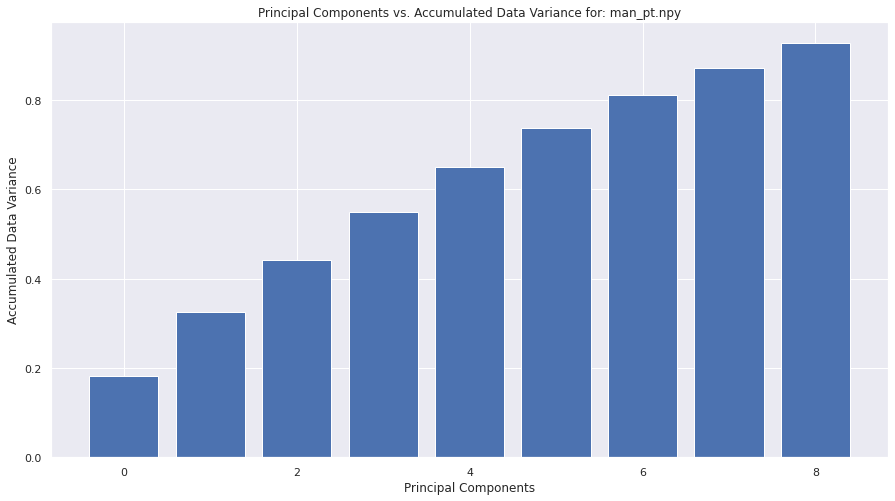

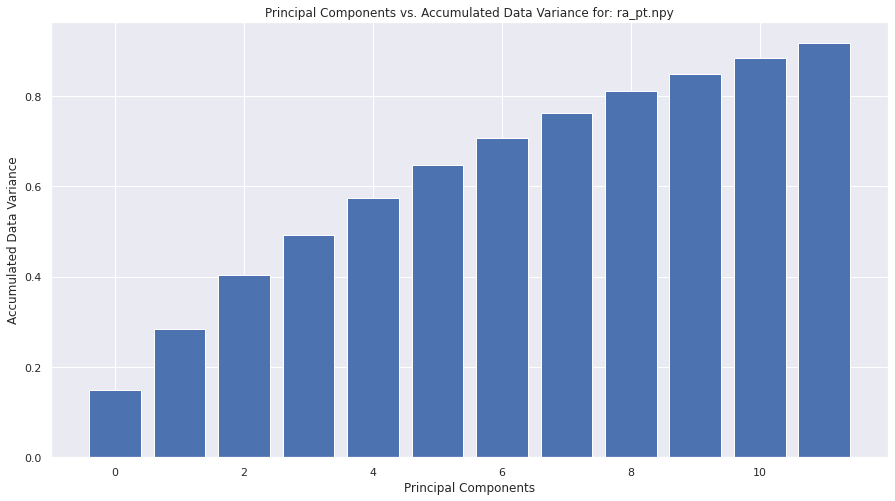

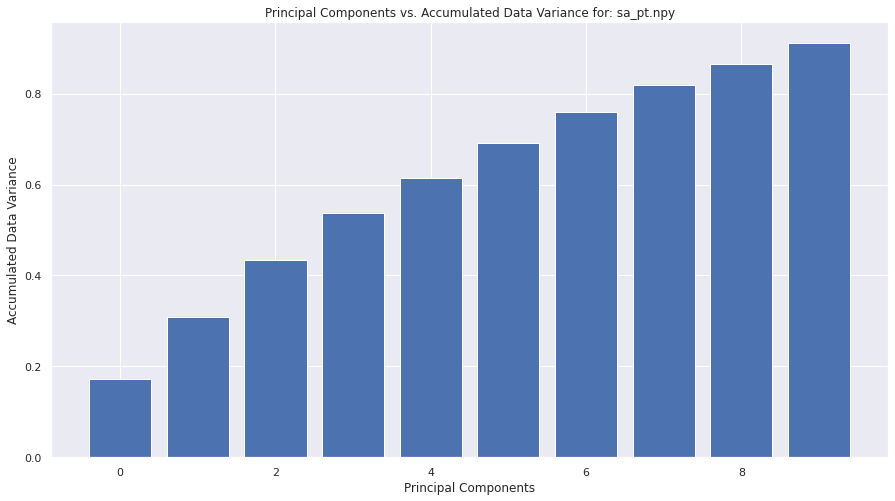

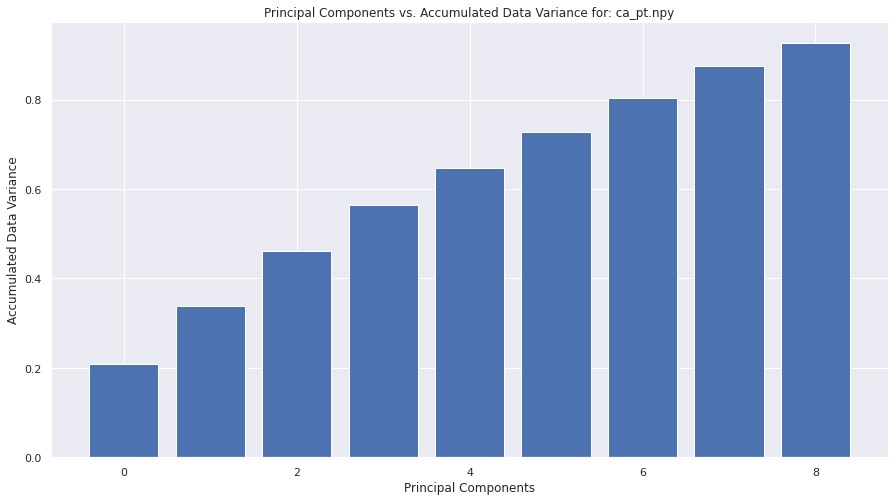

In [58]:
model_name = 'clip'
dataset = 'coco'
mode = 'pretrained' #or finetuned
degrees = 5
pval = 0.01
num_features = 8
clip_coco, all_features, all_labels = run_analysis(model_name, dataset, mode, degrees, pval, num_features, pca_analysis=True, plots=True)



In [31]:
def plot_coco(path, indices):
    images = []
    with open(path) as f:
        urls = f.readlines()
    urls_filtered = []
    for j in indices:
        urls_filtered.append(urls[j])
    print("all: ", len(urls))
    print("filtered: ", len(urls_filtered))
        
    for i in urls_filtered:
        images.append(Image.open(urllib.request.urlopen(i)))
    plt.figure(figsize=(20,10))
    columns = 4
    for i, image in enumerate(images):
        plt.subplot(len(images) / columns + 1, columns, i + 1)
        plt.imshow(image)
        plt.xticks([])
        plt.yticks([])
        
    images_dist = list(set(urls) - set(urls_filtered))
    images_intersect = []
    for i in images_dist:
        images_intersect.append(Image.open(urllib.request.urlopen(i)))
    plt.figure(figsize=(20,10))
    columns = 5
    for i, image in enumerate(images_intersect[:10]):
        plt.subplot(len(images_intersect[:10]) / columns + 1, columns, i + 1)
        plt.imshow(image)
        plt.xticks([])
        plt.yticks([])

def plot_openimages(path, indices):
    images = []
    with open(path) as f:
        ids = f.readlines()
    urls_filtered = []
    
    for j in indices:
        urls_filtered.append(ids[j])
    
    
    for i in urls_filtered:
        images.append(Image.open("../../VisionResearch/finetuneClip/openimages_dataset/val/"+i.strip()+'.jpg'))
    plt.figure(figsize=(20,10))
    columns = 5
    print("Extreme images: ", len(images))
    
    print("Plotting extreme images ... ")
    for i, image in enumerate(images[:10]):
        plt.subplot(len(images[:10]) / columns + 1, columns, i + 1)
        plt.imshow(image)
        plt.xticks([])
        plt.yticks([])
        

        
    images_dist = list(set(ids) - set(urls_filtered))
    images_intersect = []
    for i in images_dist:
        images_intersect.append(Image.open("../../VisionResearch/finetuneClip/openimages_dataset/val/"+i.strip()+'.jpg'))
    plt.figure(figsize=(20,10))
    columns = 5
    print("All ids:  ", len(images_intersect))
    print("Plotting images characteristic of distribution ... ")
    for i, image in enumerate(images_intersect[:10]):
        plt.subplot(len(images_intersect[:10]) / columns + 1, columns, i + 1)
        plt.imshow(image)
        plt.xticks([])
        plt.yticks([])

Extreme images:  150
Plotting extreme images ... 


/u/lab/jr4fs/anaconda2/envs/coco_exp/lib/python3.6/site-packages/ipykernel_launcher.py:51: MatplotlibDeprecationWarning: Passing non-integers as three-element position specification is deprecated since 3.3 and will be removed two minor releases later.


All ids:   0
Plotting images characteristic of distribution ... 


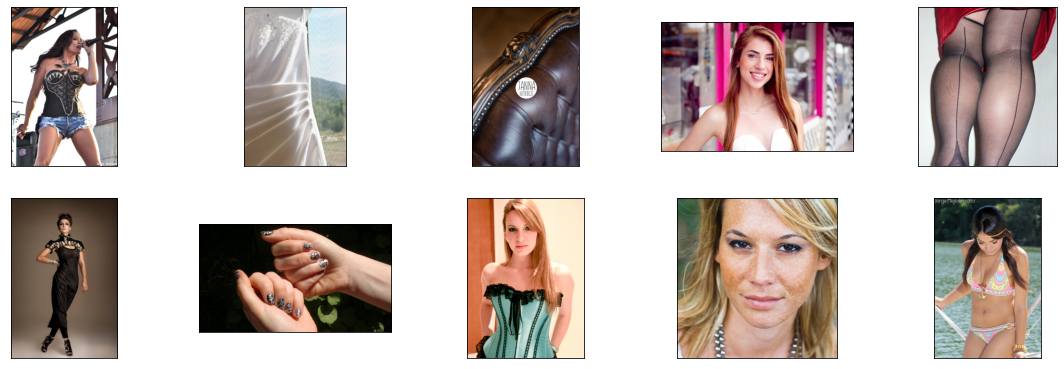

<Figure size 1440x720 with 0 Axes>

In [32]:
path = "../openimages_test/"
plot_openimages(path+"fashion_woman.txt", resnet50_openimages['fw_pt.npy'])

In [7]:
!ls ../models/resnet50_coco/pretrained_features

ca_pt.npy  man_pt.npy	  rm_pt.npy  sm_pt.npy	  woman_pt.npy
cm_pt.npy  random_pt.npy  rw_pt.npy  stop_pt.npy
cw_pt.npy  ra_pt.npy	  sa_pt.npy  sw_pt.npy


# TSNE Analysis

In [12]:
from sklearn.manifold import TSNE
import pandas as pd
import seaborn as sns

model_name = 'resnet50'
dataset = 'coco'
mode = 'pretrained' #or finetuned
degrees = 5
pval = 0.01
num_features = 8
resnet50_coco, all_features, all_labels = run_analysis(model_name, dataset, mode, degrees, pval, num_features, pca_analysis=False, plots=False, tsne=True)





In [43]:
all_labels[136:150]

['sa_pt',
 'sa_pt',
 'sa_pt',
 'sa_pt',
 'sa_pt',
 'sa_pt',
 'sa_pt',
 'sa_pt',
 'sa_pt',
 'sa_pt',
 'sa_pt',
 'sa_pt',
 'sa_pt',
 'sa_pt',
 'ca_pt']

In [45]:
all_features_tsne = np.concatenate(all_features)
print(all_features_tsne.shape)
print(len(all_labels))

surfb_labels = all_labels[:16] + all_labels[22:45]+all_labels[136:150]
surfb_woman = np.concatenate((all_features_tsne[:16], all_features_tsne[22:45],all_features_tsne[136:150]))


# We want to get TSNE embedding with 2 dimensions
n_components = 3
tsne = TSNE(n_components)
tsne_result = tsne.fit_transform(surfb_woman)

tsne_result.shape
# (1000, 2)
# Two dimensions for each of our images
 
# Plot the result of our TSNE with the label color coded
# A lot of the stuff here is about making the plot look pretty and not TSNE




tsne_result_df = pd.DataFrame({'tsne_1': tsne_result[:,0], 'tsne_2': tsne_result[:,1], 'label': surfb_woman_labels})

sns.set(rc = {'figure.figsize':(15,8)})
fig, ax = plt.subplots(1)
sns.scatterplot(x='tsne_1', y='tsne_2', hue='label', data=tsne_result_df, ax=ax,s=120)
lim = (tsne_result.min()-5, tsne_result.max()+5)
ax.set_xlim(lim)
ax.set_ylim(lim)
ax.set_aspect('equal')
ax.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.0)

(206, 133)
206


ValueError: arrays must all be same length

In [20]:
surfb_woman_labels

['sw_pt',
 'sw_pt',
 'sw_pt',
 'sw_pt',
 'sw_pt',
 'sw_pt',
 'sw_pt',
 'sw_pt',
 'sw_pt',
 'sw_pt',
 'sw_pt',
 'sw_pt',
 'sw_pt',
 'sw_pt',
 'sw_pt',
 'sw_pt']

(206, 133)
206


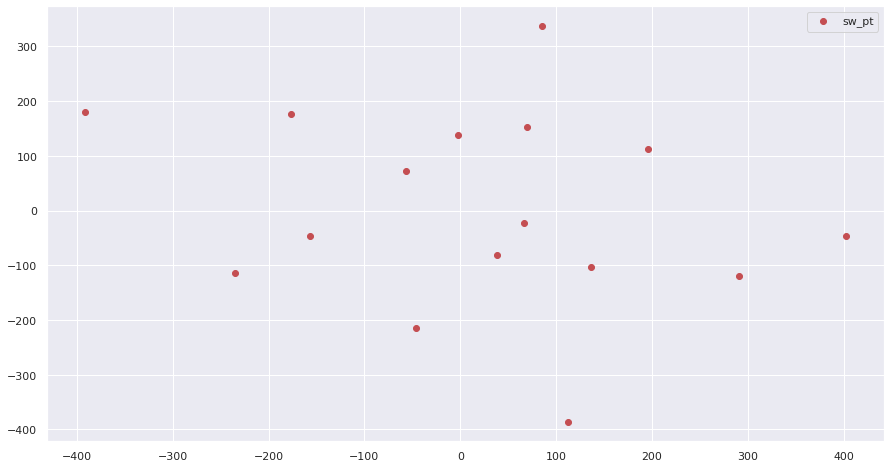

In [22]:
all_features_tsne = np.concatenate(all_features)
print(all_features_tsne.shape)
print(len(all_labels))

surfb_woman_labels = all_labels[:16]
surfb_woman = all_features_tsne[:16]


# We want to get TSNE embedding with 2 dimensions
n_components = 3
tsne = TSNE(n_components)
tsne_result = tsne.fit_transform(surfb_woman)



# initialize a matplotlib plot
fig = plt.figure()
ax = fig.add_subplot(111)
colors_per_class = {'sw_pt': 'r'}
# for every class, we'll add a scatter plot separately

for label in colors_per_class:
    # find the samples of the current class in the data
    indices = [i for i, l in enumerate(surfb_woman_labels) if l == label]

    # extract the coordinates of the points of this class only
    current_tx = np.take(tsne_result[:,0], indices)
    current_ty = np.take(tsne_result[:,1], indices)

    # convert the class color to matplotlib format
    #color = np.array(colors_per_class[label], dtype=np.float) / 255

    # add a scatter plot with the corresponding color and label
    ax.scatter(current_tx, current_ty, c='r', label=label)

# build a legend using the labels we set previously
ax.legend(loc='best')

# finally, show the plot
plt.show()